## Import some things

In [1]:
from Liver_Generator import Data_Generator, os, plot_scroll_Image

Using TensorFlow backend.
c:\users\bmanderson\appdata\local\programs\python\python36\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
%matplotlib notebook

In [3]:
data_path = os.path.join('..','Data','Numpy_Arrays')
train_path = os.path.join(data_path,'Train')
validation = os.path.join(data_path,'Validation')

In [4]:
train_generator = Data_Generator(train_path, batch_size=10, channels=3, mean_val=81, std_val=31) # mean_val=81,std_val=30

Loading 10% done
Loading 20% done
Loading 30% done
Loading 40% done
Loading 50% done
Loading 60% done
Loading 70% done
Loading 80% done
Loading 90% done
Loading 100% done


## Normalize images about the mask to be mean 0, std 1

In [5]:
train_generator.get_mean_std_val() # This will calculate the mean and std for you

Calculating mean and std...0% done
Calculating mean and std...1% done
Calculating mean and std...1% done
Calculating mean and std...2% done
Calculating mean and std...3% done
Calculating mean and std...3% done
Calculating mean and std...4% done
Calculating mean and std...5% done
Calculating mean and std...5% done
Calculating mean and std...6% done
Calculating mean and std...7% done
Calculating mean and std...7% done
Calculating mean and std...8% done
Calculating mean and std...8% done
Calculating mean and std...9% done
Calculating mean and std...10% done
Calculating mean and std...10% done
Calculating mean and std...11% done
Calculating mean and std...12% done
Calculating mean and std...12% done
Calculating mean and std...13% done
Calculating mean and std...14% done
Calculating mean and std...14% done
Calculating mean and std...15% done
Calculating mean and std...16% done
Calculating mean and std...16% done
Calculating mean and std...17% done
Calculating mean and std...18% done
Calcula

In [6]:
train_generator.mean_val

81.0

In [7]:
x,y = train_generator.__getitem__(0)

<IPython.core.display.Javascript object>


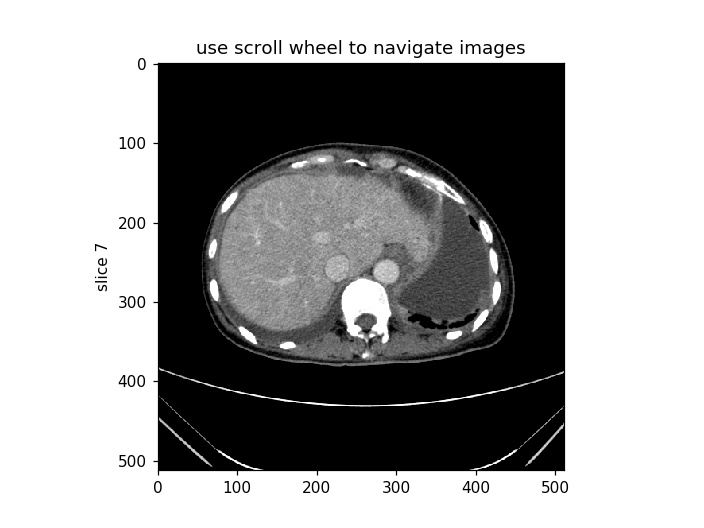

(<Figure size 640x480 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT.IndexTracker at 0x15873363f28>)

In [9]:
plot_scroll_Image(x[...,0])

### Alright, lets make our model!

In [10]:
from Easy_VGG16_UNet.Keras_Fine_Tune_VGG_16_Liver import VGG_16
from Visualizing_Model.Visualing_Model import visualization_model_class

In [11]:
network = {'Layer_0': {'Encoding': [64, 64], 'Decoding': [64, 32]},
           'Layer_1': {'Encoding': [128, 128], 'Decoding': [128]},
           'Layer_2': {'Encoding': [256, 256, 256], 'Decoding': [256]},
           'Layer_3': {'Encoding': [512, 512, 512], 'Decoding': [512]},
           'Layer_4': {'Encoding': [512, 512, 512]}}
VGG_model = VGG_16(network=network, activation='relu',filter_size=(3,3))
VGG_model.make_model()
VGG_model.load_weights()
new_model = VGG_model.created_model

W1017 10:29:20.841913 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 10:29:20.865092 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1017 10:29:20.890159 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1017 10:29:20.994061 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.i

Layer_3
Layer_2
Layer_1
Layer_0


W1017 10:29:21.409425 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1017 10:29:21.410428 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1017 10:29:21.410428 10840 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [20]:
Visualizing_Class = visualization_model_class(model=new_model, desired_layer_names=['block1_conv1'])

In [21]:
new_model.layers[1].name

'block1_conv1'

In [22]:
Visualizing_Class.predict_on_tensor(x)

In [23]:
Visualizing_Class.plot_activations()

['block1_conv1']
block1_conv1
0.0


<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
new_x = np.tile(x,1)
new_x.shape

In [ ]:
plot_scroll_Image(new_x[...,2])